The following table contains the estimated bulk mass densities as a function of depth for an offshore location in Brazil. Water depth is 500m. Measurements indicate that porosity of shale layers estimated through resistivity measurements.

|Depth (m)| Bulk mass density (kg/m$^3$) | Shale porosity |
|:-------:|:-------------------------:|:--------------:|
| 0   | 1025 | | 
| 100 | 1026 | |
| 200 | 1026 | |
| 300 | 1030 | |
| 400 | 1030 | |
| 500 | 1031 | |
| 600 | 1900 | |
| 700 | 2190 | |
| 800 | 2200 | |
| 900 | 2230 | |
| 1000| 2235 | |
| 1100| 2240 | |
| 1200| 2275 | 0.305 |
| 1300| 2305 | 0.297 |
| 1400| 2310 | 0.286 |
| 1500| 2308 | 0.281 |
| 1600| 2310 | 0.285 |
| 1700| 2305 | 0.293 |
| 1800| 2310 | 0.307 |
| 1900| 2324 | 0.305 |
| 2000| 2319 | 0.298 |


 a. Plot $S_v$ as a function of depth (in SI units)

 b. Plot hydrostatic water pressure as a function of depth. Assume the density of brine water is 1031 kg/m$^3$
in the rock pore space (in SI units).

 c. Additional compaction lab measurements on shale cores indicate a good fit of the porosity-effective vertical stress relation through the equation $\phi = \phi_0 \exp(-\beta (S_v - P_p))$, with parameters $\phi_0=0.38$ and $\beta = 3 \cdot 10^{-2}$ MPa$^{-1}$. Estimate the pore pressure in the shale. Is there overpressure? At what depth does it start?

 d. Plot vertical effective strees, $\sigma_v^{eff}$ as a function of depth (in SI units).

**Solution**

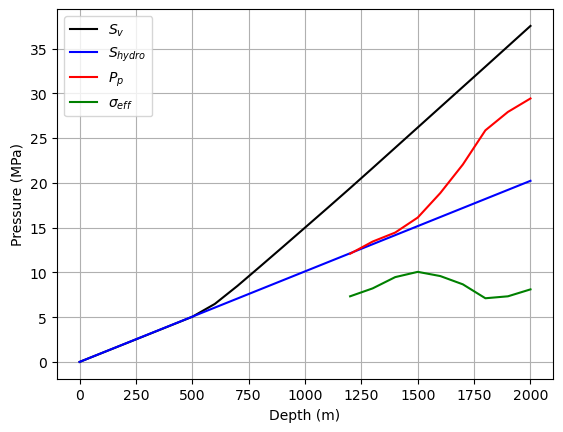

In [1]:
import numpy as np
from scipy import integrate
import scipy.optimize

import matplotlib.pyplot as plt

#Input data
depth = np.linspace(0, 2000, num=21)
density = np.array([1025, 1026, 1026, 1030, 1030, 1031, 1900, 2190, 
                    2200, 2230, 2235, 2240, 2275, 2305, 2310, 2308, 
                    2310, 2305, 2310, 2323, 2319])
density_brine = 1031. * np.ones_like(density)
porosity = np.array([0.305, 0.297, 0.286, 0.281, 0.285, 0.293, 0.307, 0.305, 0.298])

#Compute S_v
Sv = integrate.cumtrapz(density * 9.81, depth, initial=0)
#Compute S_hydro
hydro = integrate.cumtrapz(density_brine * 9.81, depth, initial=0)
#Compute P_p
phi_0 = 0.38
beta = 3e-2 / (1e6)
Pp = Sv[-len(porosity):] + (1. / beta) * np.log(porosity / phi_0)
#Compute sigma_eff
sigma_eff = Sv[-len(porosity):] - Pp
#Create plot
plt.plot(depth, Sv / 1e6, 'k', label="$S_v$") 
plt.plot(depth, hydro / 1e6, 'b', label="$S_{hydro}$") 
plt.plot(depth[-(len(porosity)):], Pp / 1e6, 'r', label="$P_p$")
plt.plot(depth[-(len(porosity)):], sigma_eff / 1e6, 'g', label="$\sigma_{eff}$");
plt.grid()
plt.legend(loc=2)
plt.xlabel("Depth (m)")
plt.ylabel("Pressure (MPa)");

Below are the depths at which there is an overpressure.

In [2]:
depth[-(len(porosity)):][Pp > hydro[-(len(porosity)):]]

array([1300., 1400., 1500., 1600., 1700., 1800., 1900., 2000.])

So the overpressure starts at between 1200 and 1300 meters.